In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from scipy import misc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
car_raw = pd.read_csv("cars.csv")

In [3]:
car_raw.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
car_raw['buying'] = car_raw['buying'].replace('low',0)
car_raw['buying'] = car_raw['buying'].replace('med',1)
car_raw['buying'] = car_raw['buying'].replace('high',2)
car_raw['buying'] = car_raw['buying'].replace('vhigh',3)


In [4]:
car_raw['maint'] = car_raw['maint'].replace('low',0)
car_raw['maint'] = car_raw['maint'].replace('med',1)
car_raw['maint'] = car_raw['maint'].replace('high',2)
car_raw['maint'] = car_raw['maint'].replace('vhigh',3)

In [5]:
car_raw['lug_boot'] = car_raw['lug_boot'].replace('small',0)
car_raw['lug_boot'] = car_raw['lug_boot'].replace('med',1)
car_raw['lug_boot'] = car_raw['lug_boot'].replace('big',2)


In [6]:
car_raw['safety'] = car_raw['safety'].replace('low',0)
car_raw['safety'] = car_raw['safety'].replace('med',1)
car_raw['safety'] = car_raw['safety'].replace('high',2)

In [7]:
car_raw['doors'] = car_raw['doors'].replace('5more',5)
car_raw['persons'] = car_raw['persons'].replace('more',5)

In [8]:
car_raw['class'] = car_raw['class'].replace({'unacc':0, 'acc':1,'good':2,'vgood':3})

In [11]:
car_raw.head()
from sklearn.model_selection import validation_curve

In [10]:
X = car_raw.drop(['class'], axis=1)
y = car_raw['class']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
train_scores, valid_scores = validation_curve(
                                                   estimator = tree.DecisionTreeClassifier(), X = X_train,
                                                   y = y_train, param_name ="max_depth", param_range=range(1,100), cv = 5,
                                                   )

In [23]:
train_scores_mean= train_scores.mean(axis=1)
test_scores_meam = valid_scores.mean(axis=1)

(0.96, 1)

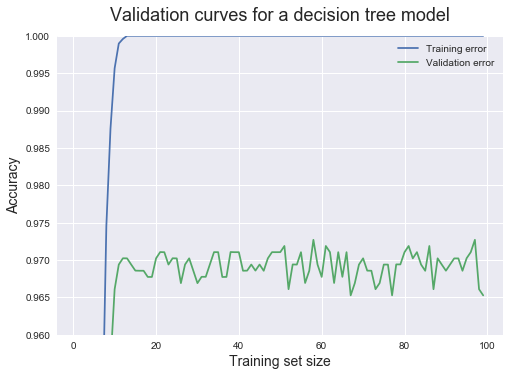

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

plt.plot(range(1,100), train_scores_mean, label = 'Training error')
plt.plot(range(1,100), test_scores_meam, label = 'Validation error')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Validation curves for a decision tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.96,1)

In [40]:
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = model, X = X,
                                                   y = y, train_sizes = np.linspace(.01,1,100), cv = 5,
                                                   shuffle=True)

In [50]:
train_scores_avg = train_scores.mean(axis=1)
#train_scores_avg
train_scores_std = train_scores.std(axis=1)

In [47]:
test_scores_avg = validation_scores.mean(axis=1)
test_scores_avg
test_scores_std = validation_scores.std(axis=1)

(0, 1)

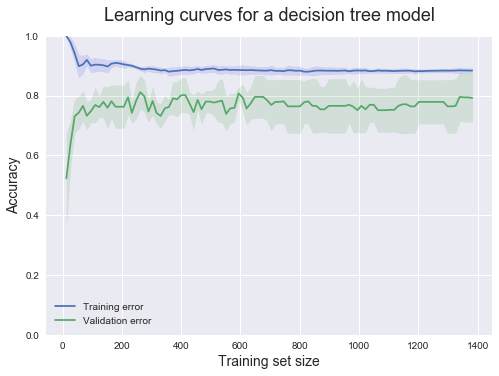

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_avg, label = 'Training error')
plt.plot(train_sizes, test_scores_avg, label = 'Validation error')
plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

In [59]:
dt_params = {'max_depth':range(1,10)}

gsDT = GridSearchCV(model,param_grid=dt_params)

gsDT.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [60]:
y_pred=gsDT.predict(X_test)
accuracy_score(y_test,y_pred)

0.94876033057851239

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=.7)

In [62]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
train_sizes, train_scores, test_scores = learning_curve(gsDT, X, y, train_sizes=np.linspace(.1, 1., 10), cv=None)

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


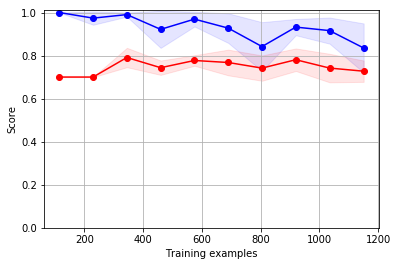

In [67]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.00, 1.01))
#plt.gca().invert_yaxis()
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")

plt.show()

In [17]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

In [18]:
model_nn =  MLPClassifier( alpha=1e-5,hidden_layer_sizes=(5, 4), random_state=1)

In [19]:
model_nn.fit(X_train, y_train)

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [20]:
y_pred_nn =  model_nn.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_nn)

0.82727272727272727

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': np.arange(3, 20)}

tree_gs = GridSearchCV(DecisionTreeClassifier(),param_grid)

In [27]:
tree_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
tree_gs.best_params_

{'max_depth': 14}

In [30]:
y_pred =tree_gs.predict(X_test)

In [31]:
accuracy_score(y_pred, y_test)

0.95619834710743801

In [67]:
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_depth", range(1,100))

In [70]:
valid_scores_avg = valid_scores.mean(axis=1)
train_scores_avg = train_scores.mean(axis=1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

plt.plot(range(, train_scores_avg, label = 'Training error')
plt.plot(train_sizes, test_scores_avg, label = 'Validation error')
plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)